In [1]:
import datetime
import pprint

import distributed
import matplotlib.pyplot as plt
import ncar_jobqueue

from analysis_tools.catalog_utils import get_cases_metadata, cases_metadata_to_catalog, catalog_sel_to_ds
from line_plots import read_line_plots_config

%load_ext autoreload
%autoreload 2

# Load plotting config

In [2]:
line_plots_config = read_line_plots_config("cesm3_dev_line_plots_config.yaml")
cases_snames = ["009", "016", "026a", "027a", "026b", "026b.cice6.fix", "026c", "026d"]
cases_snames = ["026c", "026e.cice6", "026g"]
cases_snames = ["026g", "032", "033"]
cases_snames = ["073", "073b", "075", "075b"]
cases_snames = ["g_004_zstar", "g_005_hycom1"]

# Load case metadata for specified cases

In [3]:
cases_metadata = get_cases_metadata(line_plots_config["case_metadata_paths"], cases_snames)
pprint.pprint(cases_metadata, depth=2)

[{'case': 'g.e23_a16g.GJRAv4.TL319_t232_zstar_N65.2024.004',
  'components': [...],
  'esmcol_spec_path': '/glade/work/klindsay/analysis/esmcol_cesm3_dev/g.e23_a16g.GJRAv4.TL319_t232_zstar_N65.2024.004.json',
  'sname': 'g_004_zstar'},
 {'case': 'g.e23_a16g.GJRAv4.TL319_t232_hycom1_N75.2024.005',
  'components': [...],
  'esmcol_spec_path': '/glade/work/klindsay/analysis/esmcol_cesm3_dev/g.e23_a16g.GJRAv4.TL319_t232_hycom1_N75.2024.005.json',
  'sname': 'g_005_hycom1'}]


# Obtain Computational Resources

In [4]:
cluster = ncar_jobqueue.NCARCluster(
    cores=1,  # The number of cores you want
    memory='6GB',  # Amount of memory
    processes=1,  # How many processes
    resource_spec="select=1:ncpus=1:mem=6GB",
    walltime='06:00:00',  # Amount of wall time
    interface='ext',
)

cluster.scale(12)

client = distributed.Client(cluster)
client

/glade/work/klindsay/miniconda3/envs/MOM_analysis/lib/python3.8/site-packages/dask_jobqueue/core.py:251: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/klindsay/miniconda3/envs/MOM_analysis/lib/python3.8/site-packages/dask_jobqueue/core.py:270: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/klindsay/proxy/45463/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/klindsay/proxy/45463/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://128.117.208.112:37379,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/klindsay/proxy/45463/status,Total threads: 0
Started: Just now,Total memory: 0 B


# Generate catalog of output available from specified cases

In [5]:
catalog = cases_metadata_to_catalog(
    cases_metadata,
    # path_pattern="[._]00[0-2][0-9][-_][0-1][0-9].nc",
)

catalog

case sname=g_004_zstar
loading esmcol files for g_004_zstar
case sname=g_005_hycom1
loading esmcol files for g_005_hycom1


,unique
case,2
scomp,2
path,43178
stream,7
datestring,3720
varname,7
date_start,3720
date_end,3721


In [6]:
def date_parser(value):
    """parse date string to date object"""
    if value == "":
        return None
    else:
        return datetime.datetime.strptime(value, "%Y-%m-%d").date()

date_range = [date_parser("0276-01-01"), date_parser("0306-01-01")]
date_string = "yrs 276-305(1989-2018)"

In [7]:
varname = "tos"

h.native


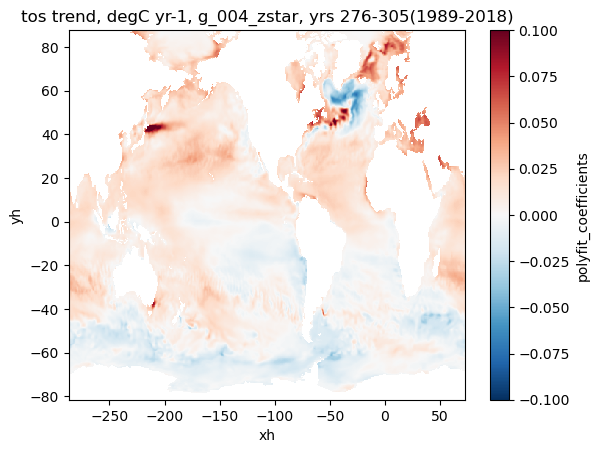

h.native


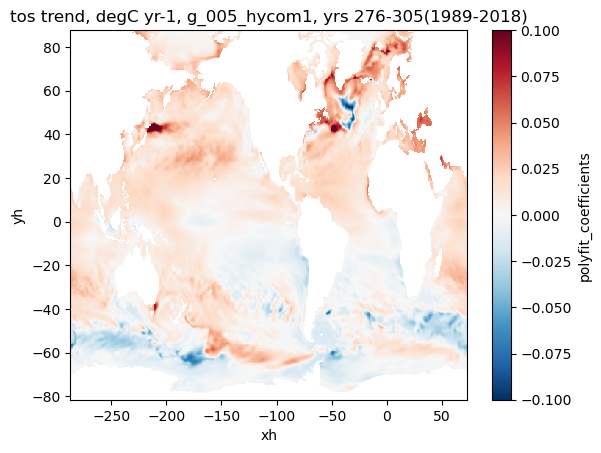

In [8]:
for case_metadata in cases_metadata:
    sname = case_metadata["sname"]
    case = case_metadata["case"]
    scomp = "mom6"
    stream = "h.native"
    print(stream)

    ds = catalog_sel_to_ds(catalog, date_range, case, scomp, stream, varname)

    da = ds[varname]

    pf = da.polyfit("time", 1)
    slope = pf.polyfit_coefficients.sel(degree=1)
    slope *= 1e9 * 86400 * 365
    slope_units = da.attrs["units"] + " yr-1"

    slope.clip(min=-.10, max=.10).plot()
    plt.title(f"{varname} trend, {slope_units}, {sname}, {date_string}")
    plt.show()

In [9]:
varname = "sos"

h.native


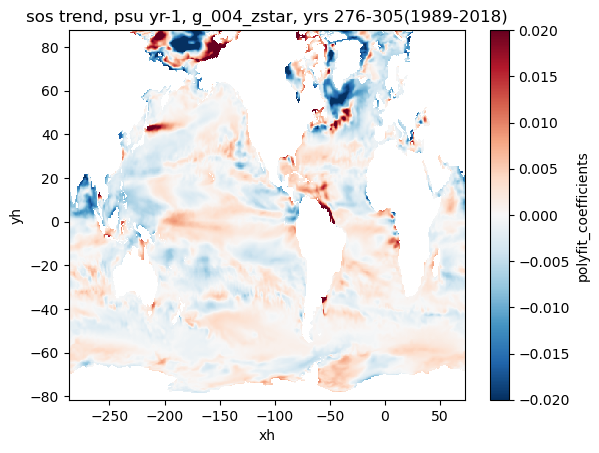

h.native


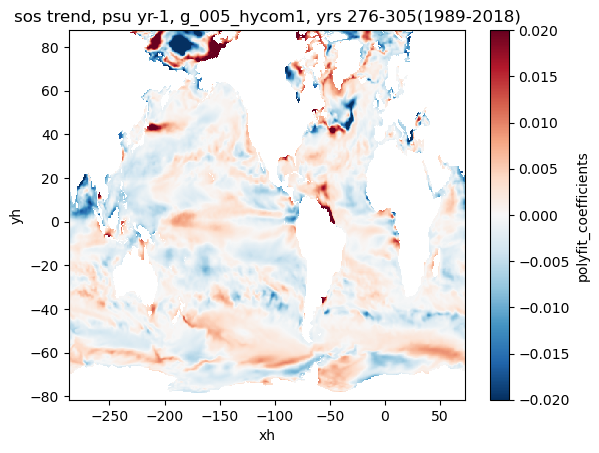

In [10]:
for case_metadata in cases_metadata:
    sname = case_metadata["sname"]
    case = case_metadata["case"]
    scomp = "mom6"
    stream = "h.native"
    print(stream)

    ds = catalog_sel_to_ds(catalog, date_range, case, scomp, stream, varname)

    da = ds[varname]

    pf = da.polyfit("time", 1)
    slope = pf.polyfit_coefficients.sel(degree=1)
    slope *= 1e9 * 86400 * 365
    slope_units = da.attrs["units"] + " yr-1"

    slope.clip(min=-.02, max=.02).plot()
    plt.title(f"{varname} trend, {slope_units}, {sname}, {date_string}")
    plt.show()

In [11]:
varname = "SSH"

h.native


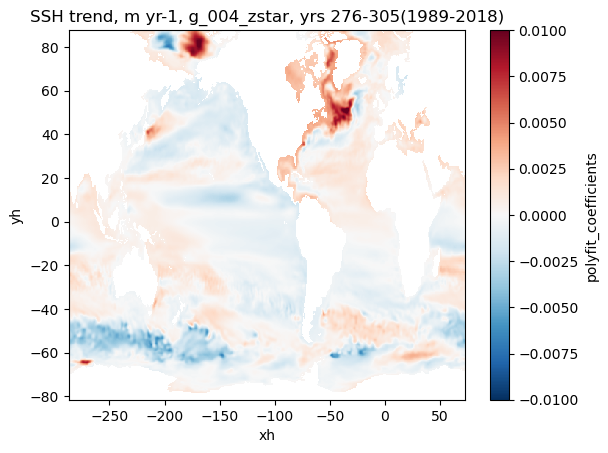

h.native


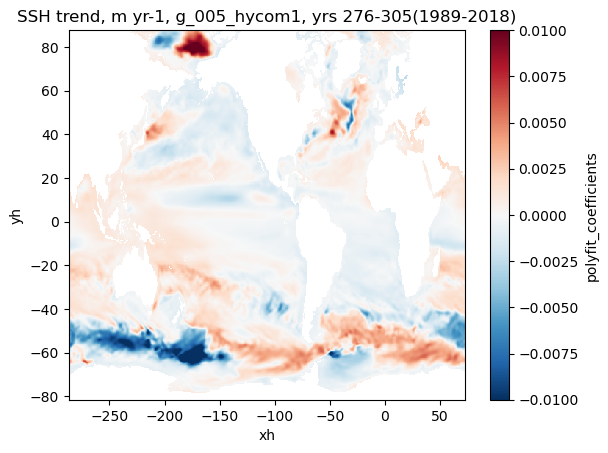

In [12]:
for case_metadata in cases_metadata:
    sname = case_metadata["sname"]
    case = case_metadata["case"]
    scomp = "mom6"
    stream = "h.native"
    print(stream)

    ds = catalog_sel_to_ds(catalog, date_range, case, scomp, stream, varname)

    da = ds[varname]

    pf = da.polyfit("time", 1)
    slope = pf.polyfit_coefficients.sel(degree=1)
    slope *= 1e9 * 86400 * 365
    slope_units = da.attrs["units"] + " yr-1"

    slope.clip(min=-.01, max=.01).plot()
    plt.title(f"{varname} trend, {slope_units}, {sname}, {date_string}")
    plt.show()

# Release Computational Resources

In [13]:
client.close()
cluster.close()


/glade/work/klindsay/miniconda3/envs/MOM_analysis/lib/python3.8/site-packages/dask_jobqueue/core.py:251: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/klindsay/miniconda3/envs/MOM_analysis/lib/python3.8/site-packages/dask_jobqueue/core.py:270: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
